# Marketing Analytics: Customer Segmentation

### Import Libraries and CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [2]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [3]:
df.shape

(2205, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
len(df[df.duplicated])

184

In [6]:
df.drop_duplicates(keep='first', inplace=True)

In [7]:
len(df[df.duplicated])

0

In [8]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [9]:
df.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [10]:
df['Total_Spending'] = (df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds'])
df['Total_Spending']

0       1617
1         27
2        776
3         53
4        422
        ... 
2198      22
2200    1341
2202    1241
2203     843
2204     172
Name: Total_Spending, Length: 2021, dtype: int64

In [11]:
df['Family_Size'] = df['Kidhome']+df['Teenhome']+1
df['Family_Size']

0       1
1       3
2       1
3       2
4       2
       ..
2198    1
2200    2
2202    1
2203    2
2204    3
Name: Family_Size, Length: 2021, dtype: int64

In [12]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Spending,Family_Size
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326,607.711034,1.952994
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812,602.396167,0.746123
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000,5.000000,1.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000,69.000000,1.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000,397.000000,2.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000,1048.000000,2.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000,2525.000000,4.000000


In [13]:
df[['Income','Age','Recency','Total_Spending']].describe()

,Income,Age,Recency,Total_Spending
count,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,51.117269,48.880752,607.711034
std,20713.046401,11.667616,28.950917,602.396167
min,1730.000000,24.000000,0.000000,5.000000
25%,35416.000000,43.000000,24.000000,69.000000
50%,51412.000000,50.000000,49.000000,397.000000
75%,68274.000000,61.000000,74.000000,1048.000000
max,113734.000000,80.000000,99.000000,2525.000000


#### Income Distribution

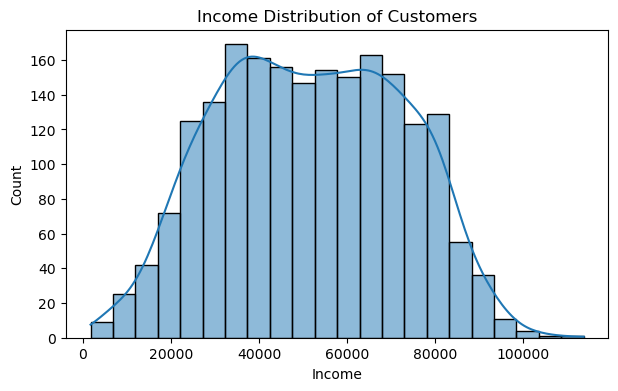

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(df['Income'], kde=True)
plt.title("Income Distribution of Customers")
plt.show()

- Most customers fall in the mid-income range.
- Very few customers belong to extremely low or high income groups.
- This indicates a diverse customer base.

#### Age vs Total Spending

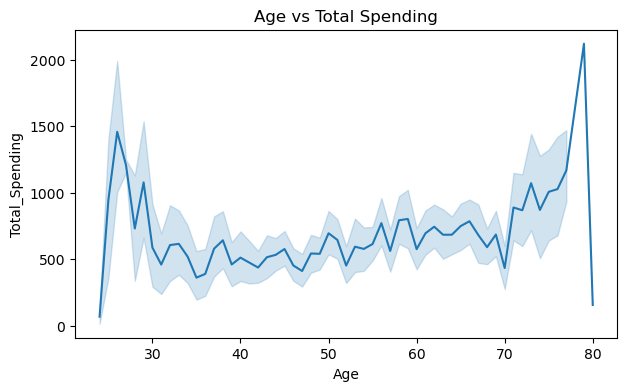

In [15]:
plt.figure(figsize=(7,4))
sns.lineplot(data=df ,x ='Age',y= 'Total_Spending' )
plt.title("Age vs Total Spending")
plt.show()

- Middle-ages and older customers spend more than younger customers.
- Total spending generally increases with age.

#### Campaign Response Analysis

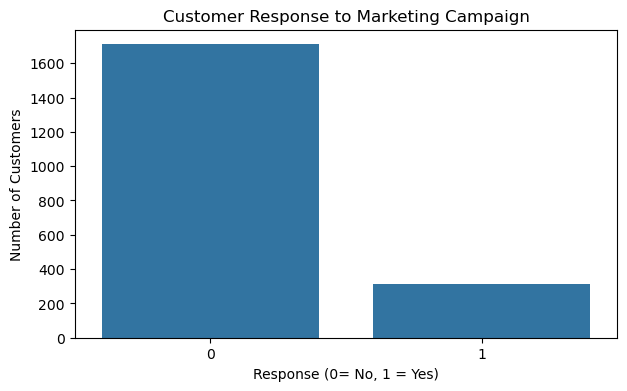

In [16]:
plt.figure(figsize=(7,4))
sns.countplot(data=df ,x ='Response' )
plt.title("Customer Response to Marketing Campaign")
plt.xlabel("Response (0= No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

- Majority of customers did not response to the campaign.
- Only about 15-16% customers accepted the campaign.
- This shows a low overall campaign response rate.

In [17]:
df['Response'].value_counts(normalize= True)*100

Response
0    84.611578
1    15.388422
Name: proportion, dtype: float64

In [18]:
features = df[['Income', 'Recency','Total_Spending','NumWebPurchases','NumStorePurchases']]
features

,Income,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
0,58138.0,58,1617,8,4
1,46344.0,38,27,1,2
2,71613.0,26,776,8,10
3,26646.0,26,53,2,4
4,58293.0,94,422,5,6
...,...,...,...,...,...
2198,26816.0,50,22,0,3
2200,61223.0,46,1341,9,4
2202,56981.0,91,1241,2,13
2203,69245.0,8,843,6,10


In [19]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3, random_state= 42)
clusters = kmeans.fit_predict(scaled_features)

- Customers are grouped into three distinct clusters.
- Clusters represent low, medium, and high spending customers.
- Higher income customers generally show higher spending.

In [21]:
df.loc[features.index, 'Cluster'] = clusters

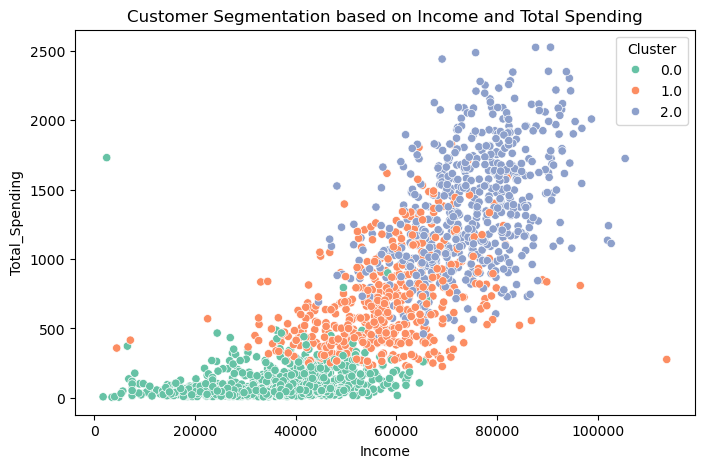

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df ,x ='Income',y= 'Total_Spending', hue= 'Cluster', palette='Set2' )
plt.title("Customer Segmentation based on Income and Total Spending")
plt.show()

##### Cluster 0- Low Value Customers:
- Low income and low spending customers.
##### Cluster 1- Medium Value Customers:
- Moderate income and average spending customers.
##### Cluster 2- High Value Customers:
- High income and highest spending customers.

In [23]:
df.groupby('Cluster')[['Income','Total_Spending','Recency']].mean()

,Income,Total_Spending,Recency
Cluster,,,
0.0,34113.490281,99.377970,49.960043
1.0,57606.306483,679.976424,40.127701
2.0,74316.122867,1348.211604,54.778157


### Business Recommendations

- High-value customers should be targeted with premium offers, loyalty programs, and exclusive deals to retain them.
- Medium-value customers can be encouraged to spend more through personalized discounts and product recommendations.
- Low-value customers should be targeted with budget-friendly offers and awareness campaigns.
- Future marketing campaigns should be customized based on customer segments to improve response rates.